In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import math
import matplotlib.dates as mdates

In [35]:
data = pd.read_csv('microsoft_cleaned_data.csv')

# Convert Date to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [36]:
# Keeping only relevant columns for training ( long term features for GRU)
data1 = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Dropping NaN values that may have been created by moving averages and Bollinger Bands
data.dropna(inplace=True)

# Splitting the dataset into training and testing sets
train = data1[:'2020']
test = data1['2021':]

In [37]:
# Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
train_scaled = sc.fit_transform(train)
test_scaled = sc.transform(test)

In [38]:
# Preparing training data
x_train, y_train = [], []
for i in range(60, len(train_scaled)):
    x_train.append(train_scaled[i-60:i])
    y_train.append(train_scaled[i, 1])  # Predicting 'High' which is the second column (index 1)

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping x_train to be 3D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))

In [39]:
print("x_train",x_train[0])

print("y_train",y_train[0])

print(len(x_train))

print(len(y_train))

print(x_train.shape) # Use slicing to get the first 5 elements

print(y_train.shape)

x_train [[0.03652149 0.03712895 0.03841267 0.03805599 0.02826372 0.09934038]
 [0.03763702 0.03712895 0.03865702 0.03810391 0.02830027 0.13570069]
 [0.03778251 0.0370335  0.03807057 0.03719325 0.02760541 0.16273823]
 [0.03656998 0.03522001 0.03645783 0.03565952 0.02643506 0.13829806]
 [0.03487245 0.03607903 0.03670218 0.03666603 0.02720311 0.14034268]
 [0.03695799 0.03550635 0.03611573 0.03479678 0.02577675 0.19663551]
 [0.03424192 0.0337883  0.03508943 0.03383819 0.02504531 0.18752146]
 [0.03477544 0.03436098 0.03557814 0.03518022 0.02606932 0.14247835]
 [0.03501794 0.03712895 0.03679992 0.03810391 0.02830027 0.17891593]
 [0.03875255 0.03779708 0.03899911 0.03762462 0.02793455 0.23241228]
 [0.037152   0.03779708 0.03885251 0.03877492 0.02881233 0.12552442]
 [0.03744301 0.03636538 0.03704427 0.03633052 0.02694708 0.15205217]
 [0.03647299 0.03531545 0.03552927 0.03355061 0.02482587 0.21052492]
 [0.0335144  0.03283383 0.02986023 0.02851802 0.02098574 0.3032425 ]
 [0.0298283  0.03025675 0.

In [40]:
# Creating the GRU model 
# The GRU architecture
regressorGRU = Sequential()

# First GRU layer with Dropout regularization
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh', use_bias=True, bias_initializer='zeros'))
regressorGRU.add(Dropout(0.2))

# Third GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# The output layer
regressorGRU.add(Dense(units=1, bias_regularizer=regularizers.L2(1e-4)))


c:\Users\choon\Documents\Chi Ling\BCSCUN\Machine Learning\MLProject\myenv1\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



c:\Users\choon\Documents\Chi Ling\BCSCUN\Machine Learning\MLProject\myenv1\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 0.0741
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0076
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0041
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0027
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0027
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0026
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0021
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 0.0022
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 0.0020
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0019
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0022
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - loss: 0.0020
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0020
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0018
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - lo

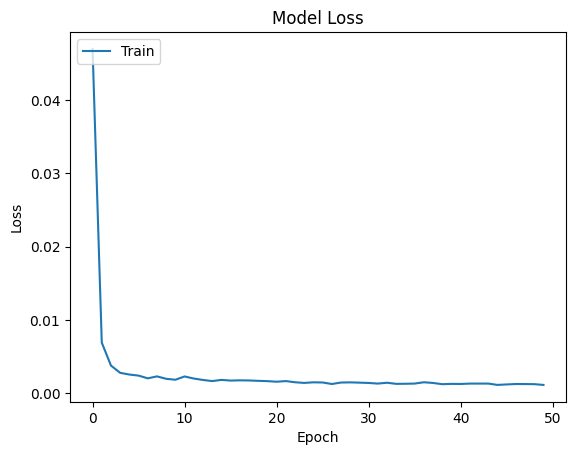

In [41]:
# Compiling the model
# Using the Stochastic Gradient Descent optimizer which is more efficient for RNNs
# SGD is used with a learning rate of 0.01 and a decay of 1e-7 to avoid overfitting
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

# Fitting the model
regressorGRU.fit(x_train, y_train, epochs=50, batch_size=150)

# Plot the loss graph
plt.plot(regressorGRU.history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

c:\Users\choon\Documents\Chi Ling\BCSCUN\Machine Learning\MLProject\myenv1\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


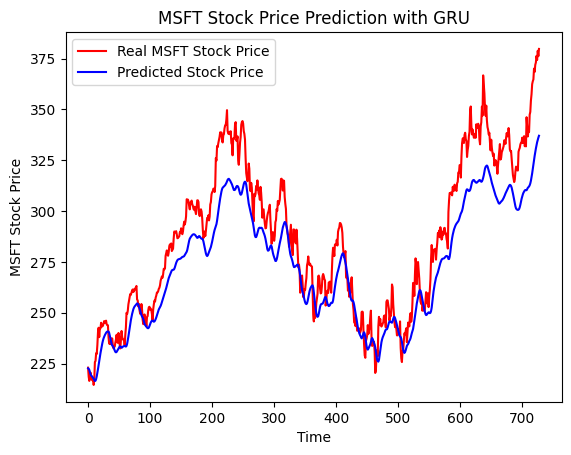

In [42]:
# # Preparing the test set
inputs = data1[len(data1) - len(test) - 60:].values
inputs = sc.transform(inputs)

# Preparing the test set
# inputs = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']][len(data) - len(test) - 60:].values
# inputs = sc.transform(inputs)

x_test = []
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

# Predicting the stock prices
predicted_with_gru = regressorGRU.predict(x_test)

# Create an array to hold the predicted values with the correct shape
predicted_with_gru_reshaped = np.zeros((predicted_with_gru.shape[0], x_test.shape[2]))  # Same number of columns as input data
predicted_with_gru_reshaped[:, 1] = predicted_with_gru.flatten()  # Assign predicted values to the "High" column

# Inverse transform the predictions
predicted_with_gru = sc.inverse_transform(predicted_with_gru_reshaped)[:, 1]  # Only take the "High" column

# Visualization of predictions
def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="Real MSFT Stock Price")
    plt.plot(predicted, color="blue", label="Predicted Stock Price")
    plt.title("MSFT Stock Price Prediction with GRU")
    plt.xlabel("Time")
    plt.ylabel("MSFT Stock Price")
    plt.legend()
    plt.show()

plot_predictions(test['High'].values, predicted_with_gru)


                Actual   Predicted
Date                              
2021-01-04  223.000000  222.665862
2021-01-05  218.520004  222.457723
2021-01-06  216.490005  221.895044
2021-01-07  219.339996  220.796138
2021-01-08  220.580002  219.755495
                Actual   Predicted
Date                              
2023-11-16  376.350006  332.377168
2023-11-17  374.369995  333.875965
2023-11-20  378.869995  335.069717
2023-11-21  376.220001  336.120339
2023-11-22  379.790009  337.078363


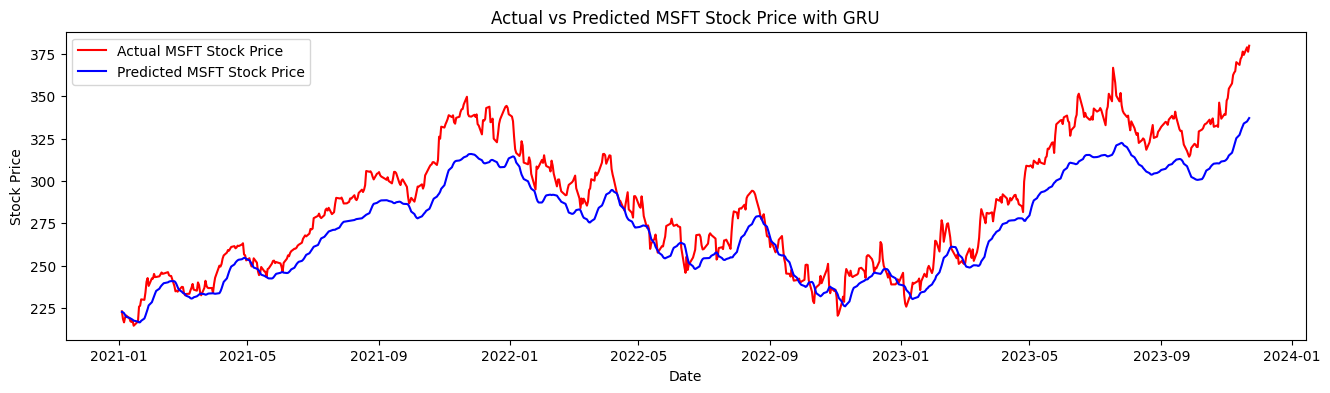

Mean Absolute Error (MAE): 14.47903111570706
Mean Squared Error (MSE): 308.4444735218049
Root Mean Squared Error (RMSE): 17.5625873242471


In [43]:
# Ensure the lengths of test and predicted_with_gru match
actual_values = test['High'].values[:len(predicted_with_gru)]

# Create a DataFrame to store the actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': actual_values,
    'Predicted': predicted_with_gru
}, index=test.index[:len(predicted_with_gru)])

# Display the DataFrame in table format
print(comparison_df.head())
print(comparison_df.tail())

# Plot the actual vs predicted values
plt.figure(figsize=(16, 4))
plt.plot(comparison_df['Actual'], label='Actual MSFT Stock Price', color='red')
plt.plot(comparison_df['Predicted'], label='Predicted MSFT Stock Price', color='blue')
plt.title('Actual vs Predicted MSFT Stock Price with GRU')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate MAE, MSE, and RMSE
actual_values = test['High'].values[:len(predicted_with_gru)]
mae = mean_absolute_error(actual_values, predicted_with_gru)
mse = mean_squared_error(actual_values, predicted_with_gru)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [44]:
# Save the model
regressorGRU.save('gru_model_v2_with_lr.h5')

In [46]:
# Splitting the data
train = data[:'2020']
test = data['2021':]

# # # Reload the data from the CSV file to get back the dropped data
# # data = pd.read_csv('microsoft_cleaned_data.csv')

# # Convert Date to datetime and set it as the index
# # data['Date'] = pd.to_datetime(data['Date'])
# # data.set_index('Date', inplace=True)

# # data.info()

# Scaling the new features for Linear Regression
features_to_scale = ['MA5', 'MA10', 'MA20', 'EMA', 'BB_upper', 'BB_lower']
scaler_lr = MinMaxScaler()
train_scaled_lr = scaler_lr.fit_transform(train[features_to_scale])
test_scaled_lr = scaler_lr.transform(test[features_to_scale])

# Prepare x_train and y_train for Linear Regression
x_train_lr, y_train_lr = train_scaled_lr, train['High'].values
x_test_lr, y_test_lr = test_scaled_lr, test['High'].values

In [47]:
# Train the Linear Regression model (using short-term features)
# residuals_train = y_train - regressorGRU.predict(x_train) 

lin_reg = LinearRegression()
lin_reg.fit(x_train_lr, y_train_lr)

# Print model coefficients (weights)
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

# Predict using Linear Regression
predicted_lr = lin_reg.predict(x_test_lr)

Coefficients: [ 282.10629445 -119.85355872  -14.99786829   88.80686035  -19.68005552
   -8.93293203]
Intercept: 23.77737110251008


In [49]:
# Make predictions on the testing set
y_pred = lin_reg.predict(x_test_lr)

# Ensure the lengths of test and y_pred match
actual_values_lr = test['High'].values[:len(y_pred)]

# Display all predictions in table form
predictions_df = pd.DataFrame({
    'Date': test.index[:len(y_pred)],
    'Predicted High Prices': y_pred,
    'Actual High Prices': actual_values_lr
})

print(predictions_df.head(10))

# Plot the actual vs predicted values
fig = go.Figure()

# Add actual high prices
fig.add_trace(go.Scatter(x=predictions_df['Date'], y=predictions_df['Actual High Prices'],
                         mode='lines', name='Actual High Prices', line=dict(color='red')))

# Add predicted high prices
fig.add_trace(go.Scatter(x=predictions_df['Date'], y=predictions_df['Predicted High Prices'],
                         mode='lines', name='Predicted High Prices', line=dict(color='blue')))

# Update layout
fig.update_layout(title='Actual vs Predicted High Prices with Linear Regression',
                  xaxis_title='Date',
                  yaxis_title='High Prices',
                  legend=dict(x=0.01, y=0.99))  # Position the legend inside the graph
fig.show()

        Date  Predicted High Prices  Actual High Prices
0 2021-01-04             225.628172          223.000000
1 2021-01-05             223.500323          218.520004
2 2021-01-06             220.822481          216.490005
3 2021-01-07             219.401897          219.339996
4 2021-01-08             218.878819          220.580002
5 2021-01-11             217.942201          218.910004
6 2021-01-12             217.933542          217.100006
7 2021-01-13             218.483906          216.759995
8 2021-01-14             218.350321          217.460007
9 2021-01-15             217.011980          214.509995


In [50]:
# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test_lr, y_pred)
mse = mean_squared_error(y_test_lr, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 3.3426885749249053
Mean Squared Error (MSE): 19.177898029086517
Root Mean Squared Error (RMSE): 4.379257702977357


In [51]:
# Combine GRU and Linear Regression predictions (average)
# predicted_combined = (predicted_with_gru[:len(predicted_lr)] + predicted_lr) / 2
predicted_combined = (0.05*predicted_with_gru**4 + 0.95*predicted_lr**4)**0.25

# Calculate MAE, MSE, and RMSE for the combined predictions
mae_combined = mean_absolute_error(test['High'].values[:len(predicted_combined)], predicted_combined)
mse_combined = mean_squared_error(test['High'].values[:len(predicted_combined)], predicted_combined)
rmse_combined = np.sqrt(mse_combined)

print(f"Mean Absolute Error (MAE) for Combined Predictions: {mae_combined}")
print(f"Mean Squared Error (MSE) for Combined Predictions: {mse_combined}")
print(f"Root Mean Squared Error (RMSE) for Combined Predictions: {rmse_combined}")

fig = go.Figure()

# Add actual stock prices
fig.add_trace(go.Scatter(x=test.index[:len(predicted_combined)], y=test['High'].values[:len(predicted_combined)],
                         mode='lines', name='Actual MSFT Stock Price', line=dict(color='red')))

# Add combined predictions
fig.add_trace(go.Scatter(x=test.index[:len(predicted_combined)], y=predicted_combined,
                         mode='lines', name='Combined GRU + Linear Regression Predicted', line=dict(color='green')))

# Update layout
fig.update_layout(title='Combined GRU + Linear Regression MSFT Stock Price Prediction',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  legend=dict(x=0.01, y=0.99))  # Position the legend inside the graph

fig.show()


Mean Absolute Error (MAE) for Combined Predictions: 3.391992492313359
Mean Squared Error (MSE) for Combined Predictions: 19.535775183364017
Root Mean Squared Error (RMSE) for Combined Predictions: 4.419929318819931


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\choon\Documents\Chi Ling\BCSCUN\Machine Learning\MLProject\myenv1\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

C:\Users\choon\AppData\Local\Temp\ipykernel_65756\18419242.py:21: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

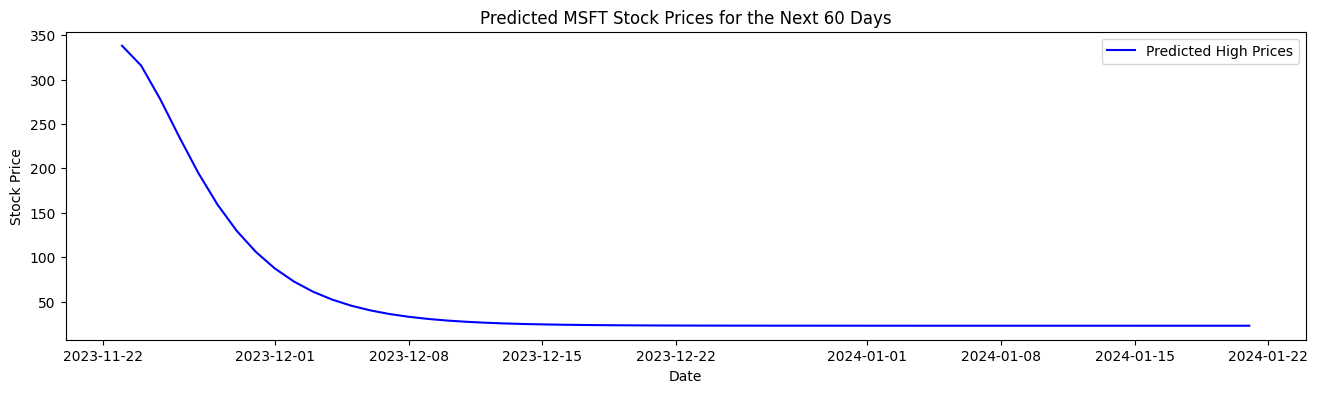

In [59]:
# Prepare the input data for the next 60 days prediction
last_60_days = data1[-60:].values
last_60_days_scaled = sc.transform(last_60_days)

# Create an empty list to store the predicted prices
predicted_prices = []

# Predict the next 60 days
for _ in range(60):
    # Reshape the input to be 3D
    input_data = np.reshape(last_60_days_scaled, (1, last_60_days_scaled.shape[0], last_60_days_scaled.shape[1]))
    
    # Predict the next day
    predicted_price = regressorGRU.predict(input_data)
    
    # Append the predicted price to the list
    predicted_prices.append(predicted_price[0, 0])
    
    # Update the input data with the predicted price
    predicted_price_scaled = np.zeros((1, last_60_days_scaled.shape[1]))
    predicted_price_scaled[0, 1] = predicted_price  # Assuming 'High' is the second column
    last_60_days_scaled = np.append(last_60_days_scaled[1:], predicted_price_scaled, axis=0)

# Inverse transform the predicted prices to get the actual values
predicted_prices = np.array(predicted_prices).reshape(-1, 1)
predicted_prices_reshaped = np.zeros((predicted_prices.shape[0], last_60_days.shape[1]))
predicted_prices_reshaped[:, 1] = predicted_prices.flatten()
predicted_prices = sc.inverse_transform(predicted_prices_reshaped)[:, 1]

# Create a date range for the next 60 days
last_date = data1.index[-1]
future_dates = pd.date_range(start=last_date, periods=61)[1:]

# Create a DataFrame to store the predicted prices
future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted High Prices': predicted_prices
})

# Display the DataFrame
print(future_predictions_df.head(10))

# Plot the predicted prices
plt.figure(figsize=(16, 4))
plt.plot(future_predictions_df['Date'], future_predictions_df['Predicted High Prices'], label='Predicted High Prices', color='blue')
plt.title('Predicted MSFT Stock Prices for the Next 60 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()